# NaN Boxing Benchmarks

In [5]:
# Librairies
%pip install -q matplotlib numpy pandas scikit-learn
import numpy as np
import re
import subprocess
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
INTERPRETER = "./target/release/som-interpreter-bc"
LIBS = "core-lib/Smalltalk core-lib/Examples/Benchmarks core-lib/Examples/Benchmarks/LanguageFeatures core-lib/Examples/Benchmarks/TestSuite core-lib/Examples/Benchmarks/ValBenchmark"

def exec_bench(name, runs=10):
    runtimes = []
    allocations = []

    for i in range(runs):
        cmd = f"{INTERPRETER} -c {LIBS} . -- BenchmarkHarness {name} 1"
        
        result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
        output = result.stdout

        runtime = re.search(r"runtime: (\d+)us", output)
        allocated = re.search(r"Allocated:    (\d+)bytes", output)
        if runtime:
            runtimes.append(int(runtime.group(1)))
        if allocated:
            allocations.append(int(allocated.group(1)))

        else:
            print("Runtime not found in output:")
            print(output)
    
    return (runtimes, allocations)


In [7]:
def plot_results(name, runtimes, allocations):
    import matplotlib.pyplot as plt

    iterations = list(range(1, len(runtimes) + 1))
    avg_runtime = sum(runtimes) / len(runtimes)
    avg_alloc = sum(allocations) / len(allocations)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

    # Runtime plot (top)
    ax1.plot(iterations, runtimes, marker='o', linestyle='-', color='blue', label='Runtime (μs)')
    ax1.axhline(avg_runtime, color='blue', linestyle='--', label=f'Avg Runtime: {avg_runtime:.1f}μs')
    ax1.set_ylabel('Runtime (μs)')
    ax1.set_title(f'Benchmark: {name}')
    ax1.legend()
    ax1.grid(True)

    # Allocation plot (bottom)
    ax2.bar(iterations, allocations, color='orange', alpha=0.6, label='Allocation (bytes)')
    ax2.axhline(avg_alloc, color='orange', linestyle='--', label=f'Avg Alloc: {avg_alloc:.0f} bytes')
    ax2.set_ylabel('Allocation (bytes)')
    ax2.set_xlabel('Iteration')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


Benchmark: DoubleBench, Runs: 100, Runtimes: [2, 4, 5, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 4, 3, 3, 2, 2, 4, 3, 3, 4, 2, 2, 4, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 12, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 10, 3, 3, 3, 3, 2], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


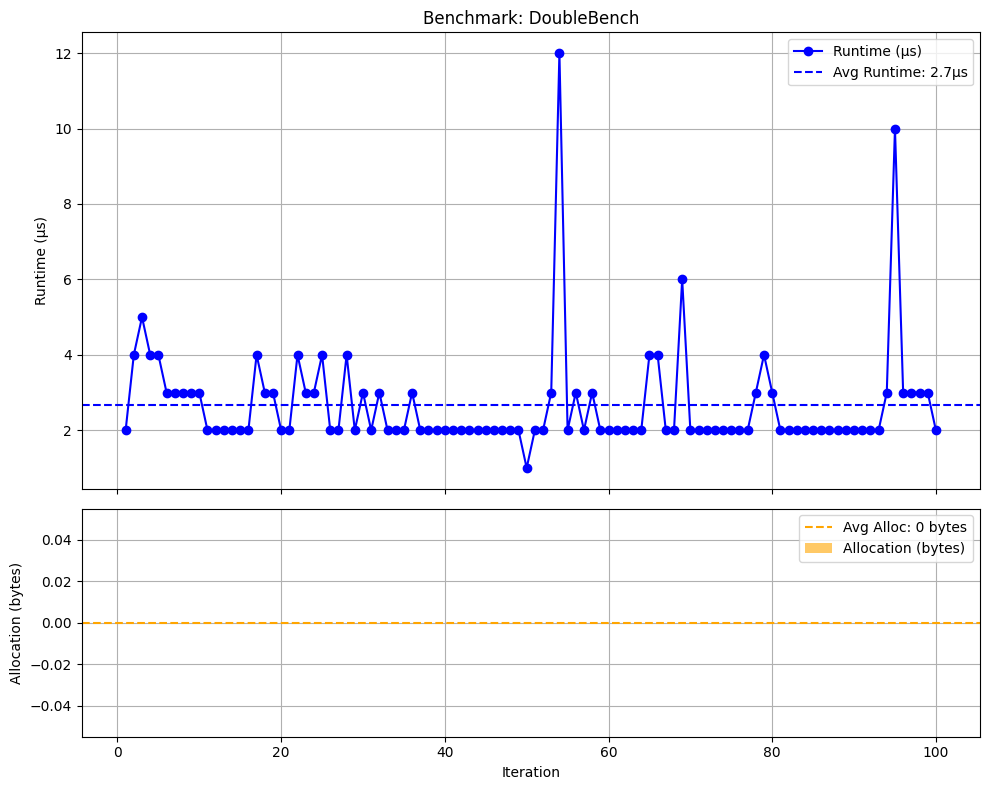

Benchmark: DoubleMedBench, Runs: 100, Runtimes: [7, 6, 6, 6, 8, 8, 6, 6, 5, 8, 6, 6, 8, 8, 7, 6, 7, 6, 8, 6, 7, 8, 7, 8, 6, 5, 6, 6, 5, 8, 8, 7, 6, 6, 8, 6, 6, 8, 8, 7, 7, 9, 6, 8, 6, 8, 6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 8, 7, 6, 6, 5, 8, 6, 8, 6, 8, 8, 7, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 8, 8, 6, 6, 6, 5, 6, 6, 6, 8, 6, 6, 6, 7, 5, 5, 6, 5, 6, 6], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


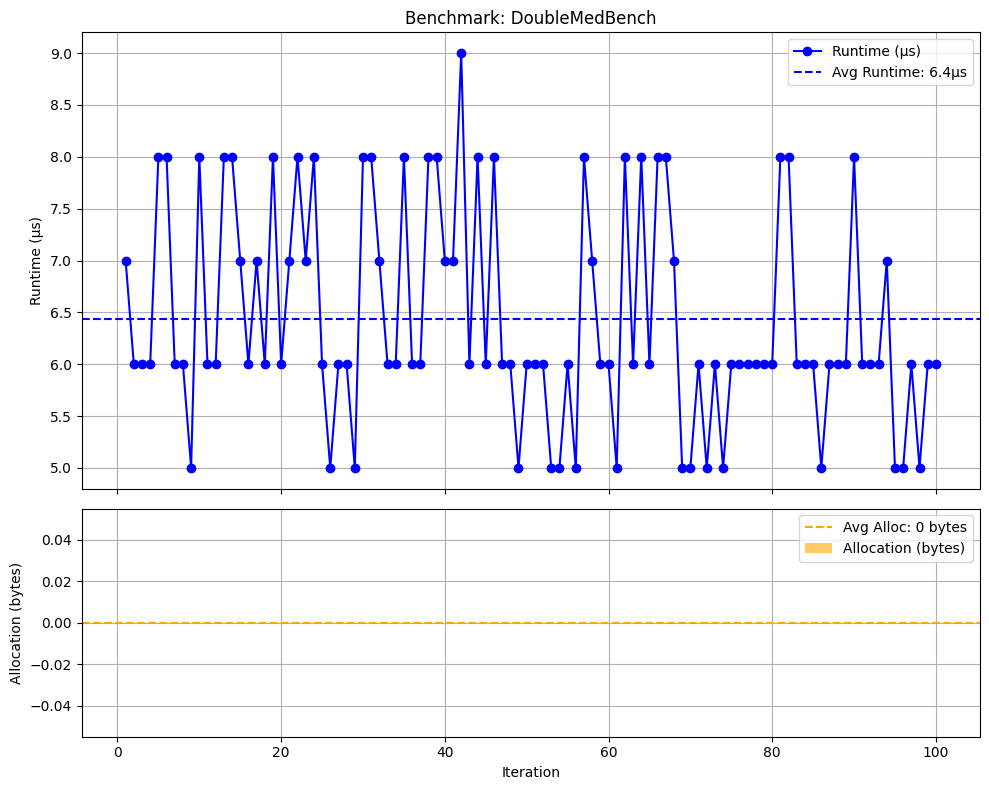

Benchmark: DoubleHighBench, Runs: 100, Runtimes: [9989, 9210, 9187, 9137, 9040, 9043, 9179, 9170, 9210, 9091, 9118, 9135, 9168, 9213, 9176, 9065, 9075, 9129, 9270, 9163, 9208, 9189, 9072, 9111, 9074, 9102, 9190, 9102, 9172, 9153, 9145, 9067, 9290, 9137, 9128, 9054, 9135, 9188, 9204, 9140, 9098, 9314, 9098, 9151, 9081, 9140, 9088, 9190, 9114, 9513, 9073, 9058, 9121, 9167, 8951, 8985, 8921, 8999, 9026, 9209, 9145, 9212, 9127, 9136, 9095, 9173, 9133, 9131, 9061, 9231, 9168, 9194, 9143, 9045, 9051, 9097, 9093, 9063, 9208, 9134, 9113, 9086, 9225, 9321, 9513, 9175, 9166, 9224, 9184, 9219, 9396, 9334, 9143, 9244, 9380, 9181, 9178, 9188, 9141, 9040], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


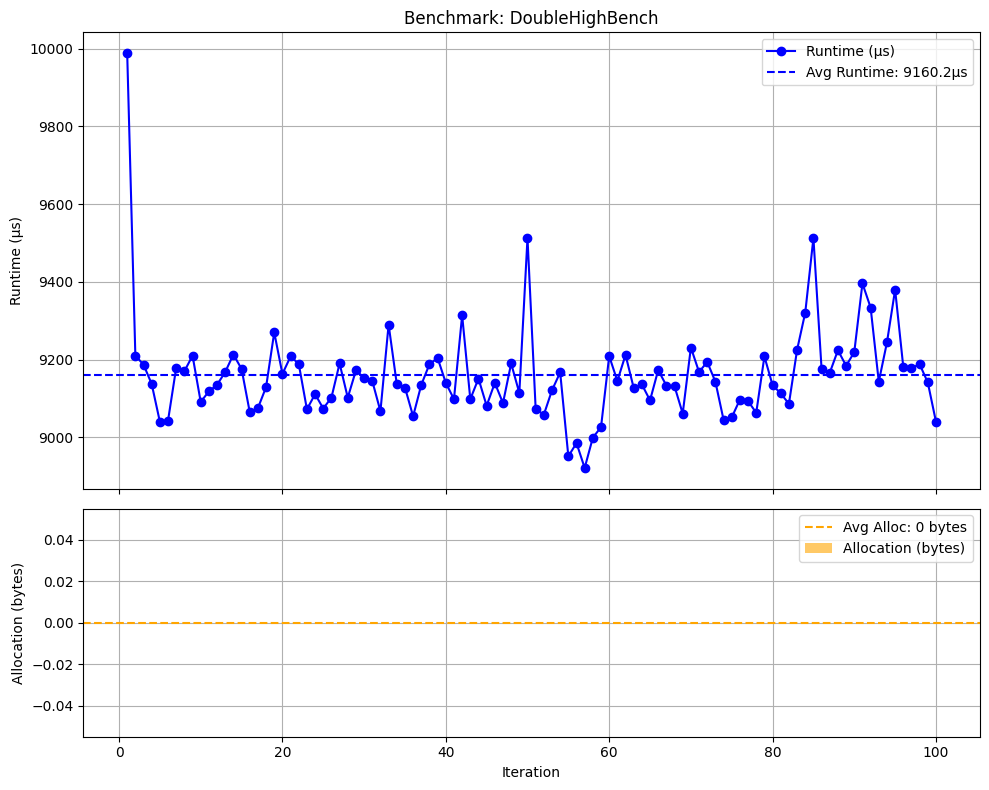

Benchmark: DoubleSqrtBench, Runs: 100, Runtimes: [1152, 1072, 1084, 1079, 1048, 1089, 1066, 1040, 1059, 1049, 1068, 1067, 1041, 1062, 1051, 1109, 1036, 1200, 1096, 1061, 1060, 1044, 1082, 1044, 1044, 1069, 1054, 1132, 1101, 1053, 1049, 1054, 1851, 1075, 1046, 1064, 1065, 1043, 1050, 1052, 1053, 1066, 1048, 1101, 1066, 1051, 1056, 1044, 1095, 1095, 1094, 1056, 1063, 1043, 1074, 1057, 1059, 1061, 1529, 1078, 1173, 1056, 1046, 1107, 1051, 1054, 1050, 1054, 1036, 1076, 1049, 1046, 1056, 1050, 1041, 1049, 1073, 1051, 1082, 1082, 1092, 1116, 1078, 1054, 1105, 1084, 1064, 1072, 1077, 1057, 1065, 1065, 1059, 1090, 1076, 1049, 1044, 1069, 1042, 1065], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


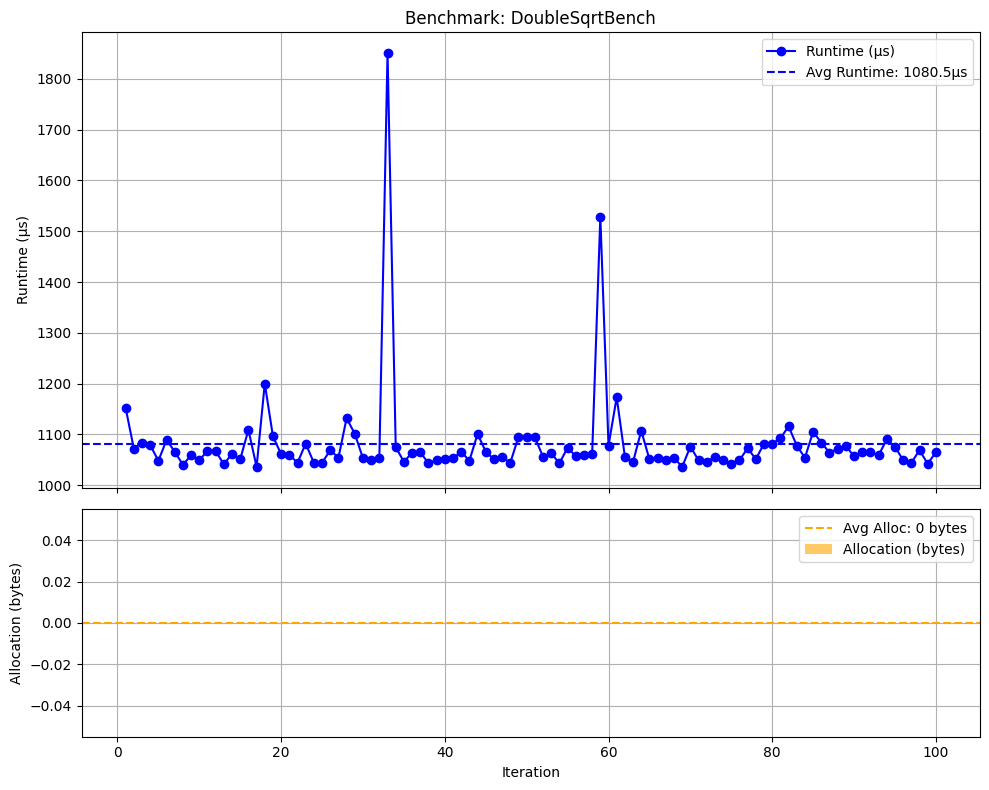

Benchmark: DoubleLExpBench, Runs: 100, Runtimes: [37, 25, 25, 24, 34, 24, 24, 24, 29, 24, 32, 30, 28, 24, 30, 24, 24, 24, 24, 29, 24, 24, 27, 29, 34, 24, 24, 25, 26, 35, 27, 36, 30, 29, 25, 24, 25, 24, 26, 24, 30, 24, 24, 24, 24, 24, 24, 29, 31, 25, 25, 24, 29, 28, 25, 25, 25, 24, 28, 28, 30, 50, 26, 25, 24, 24, 24, 30, 30, 27, 24, 25, 24, 35, 31, 31, 31, 26, 23, 24, 24, 29, 39, 29, 26, 24, 25, 24, 30, 29, 31, 26, 26, 31, 25, 24, 24, 30, 32, 30], Allocations: [32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 32768, 327

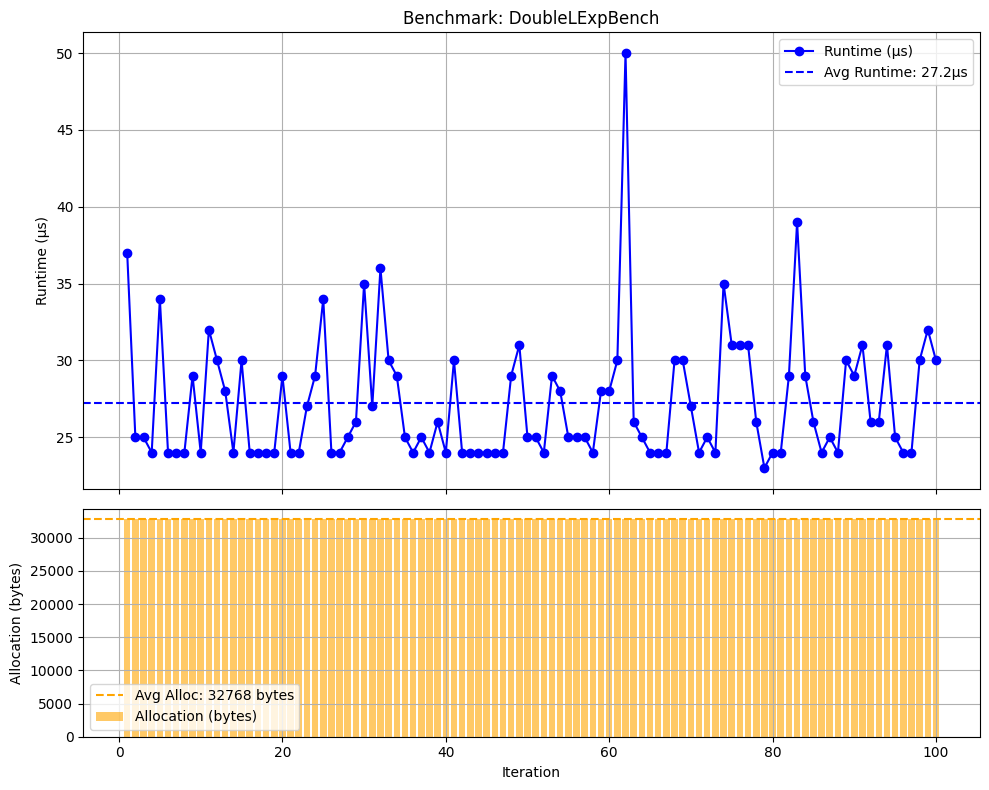

Benchmark: IntegerBench, Runs: 100, Runtimes: [4, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 1, 2, 2, 4, 4, 3, 2, 2, 2, 3, 3, 2, 1, 2, 2, 3, 3, 4, 2, 2, 2, 1, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2, 9, 2, 2, 4, 3, 3, 2, 2, 2, 4, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 1], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


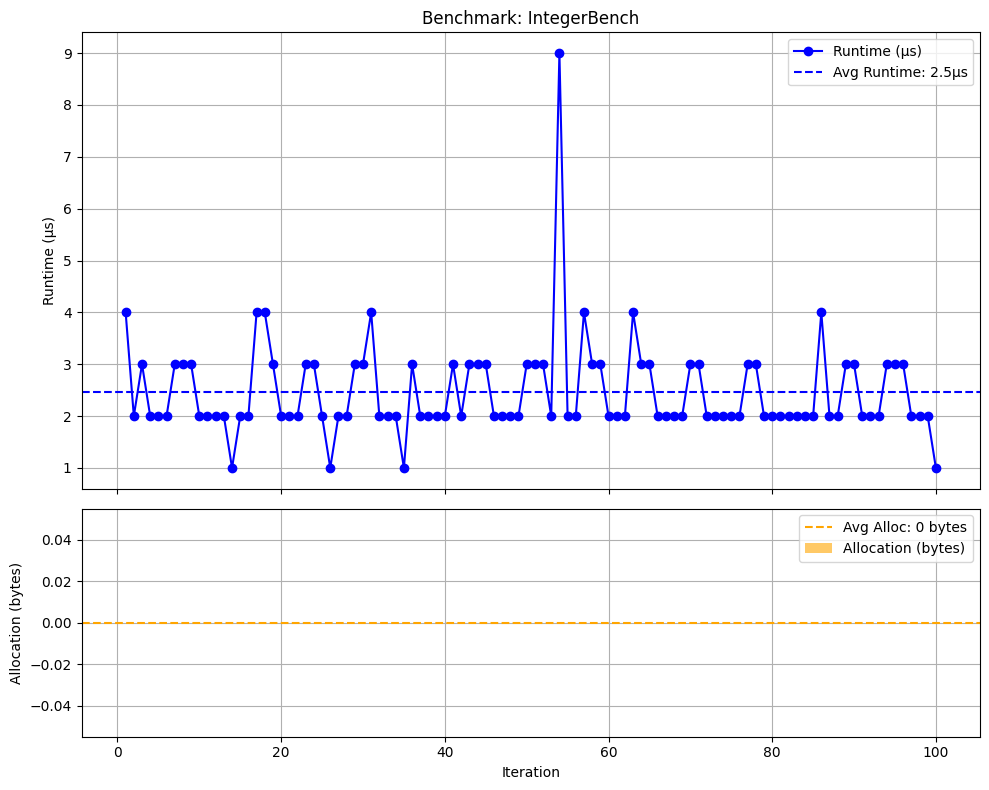

Benchmark: IntegerMedBench, Runs: 100, Runtimes: [27, 12, 14, 8, 12, 9, 9, 8, 8, 8, 13, 12, 8, 9, 9, 9, 13, 12, 12, 12, 8, 9, 13, 9, 8, 8, 8, 9, 9, 9, 8, 8, 8, 9, 10, 9, 8, 9, 9, 8, 8, 13, 8, 8, 8, 9, 8, 9, 9, 9, 9, 9, 9, 8, 8, 8, 13, 12, 9, 9, 9, 8, 9, 12, 9, 8, 8, 9, 17, 12, 11, 8, 9, 8, 8, 8, 12, 8, 8, 8, 9, 8, 12, 9, 13, 12, 12, 10, 9, 8, 13, 12, 9, 9, 11, 9, 10, 9, 18, 8], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


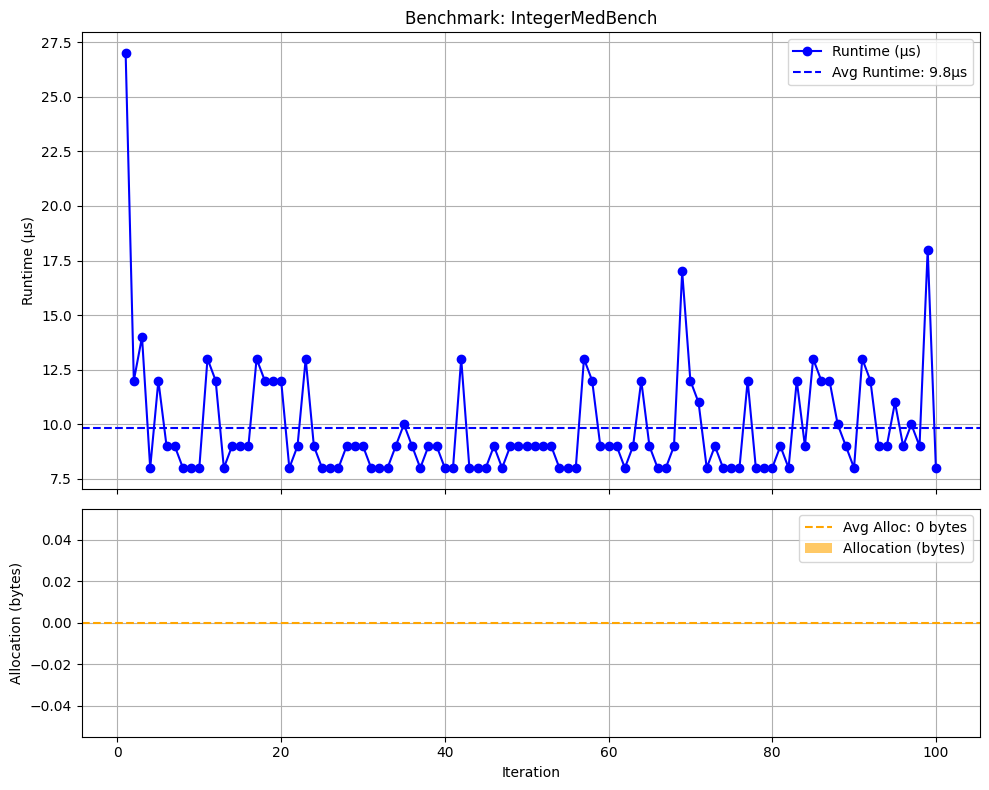

Benchmark: IntegerHighBench, Runs: 100, Runtimes: [76, 71, 72, 64, 64, 76, 67, 74, 89, 65, 68, 64, 73, 68, 73, 64, 72, 67, 68, 64, 65, 67, 68, 68, 64, 65, 67, 69, 68, 73, 79, 76, 68, 67, 65, 68, 80, 68, 68, 70, 72, 64, 67, 68, 77, 66, 71, 68, 68, 65, 74, 65, 64, 71, 65, 68, 68, 70, 79, 71, 67, 67, 69, 65, 65, 65, 66, 65, 70, 68, 68, 68, 70, 65, 68, 65, 68, 68, 69, 71, 78, 68, 75, 66, 67, 68, 71, 64, 68, 68, 68, 71, 65, 68, 68, 68, 82, 70, 70, 67], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


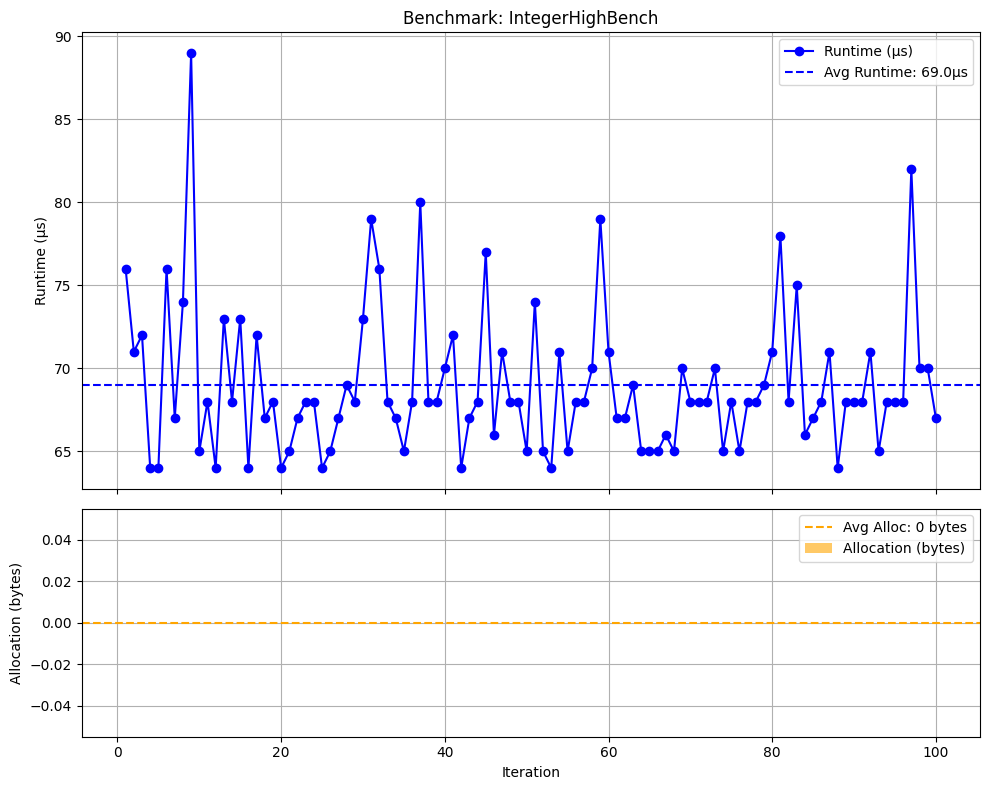

Benchmark: IntegerExpBench, Runs: 100, Runtimes: [49, 40, 45, 40, 39, 42, 51, 59, 39, 45, 39, 44, 47, 40, 43, 44, 40, 39, 39, 46, 42, 39, 48, 39, 39, 42, 40, 45, 40, 40, 48, 46, 40, 39, 47, 39, 42, 43, 39, 40, 42, 39, 40, 44, 49, 46, 41, 43, 42, 44, 47, 47, 45, 40, 44, 54, 53, 46, 39, 43, 38, 46, 46, 49, 44, 49, 42, 46, 46, 48, 40, 44, 43, 49, 77, 39, 44, 42, 40, 46, 43, 123, 42, 44, 44, 42, 41, 45, 43, 40, 52, 42, 42, 46, 46, 57, 45, 47, 45, 44], Allocations: [69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69632, 69

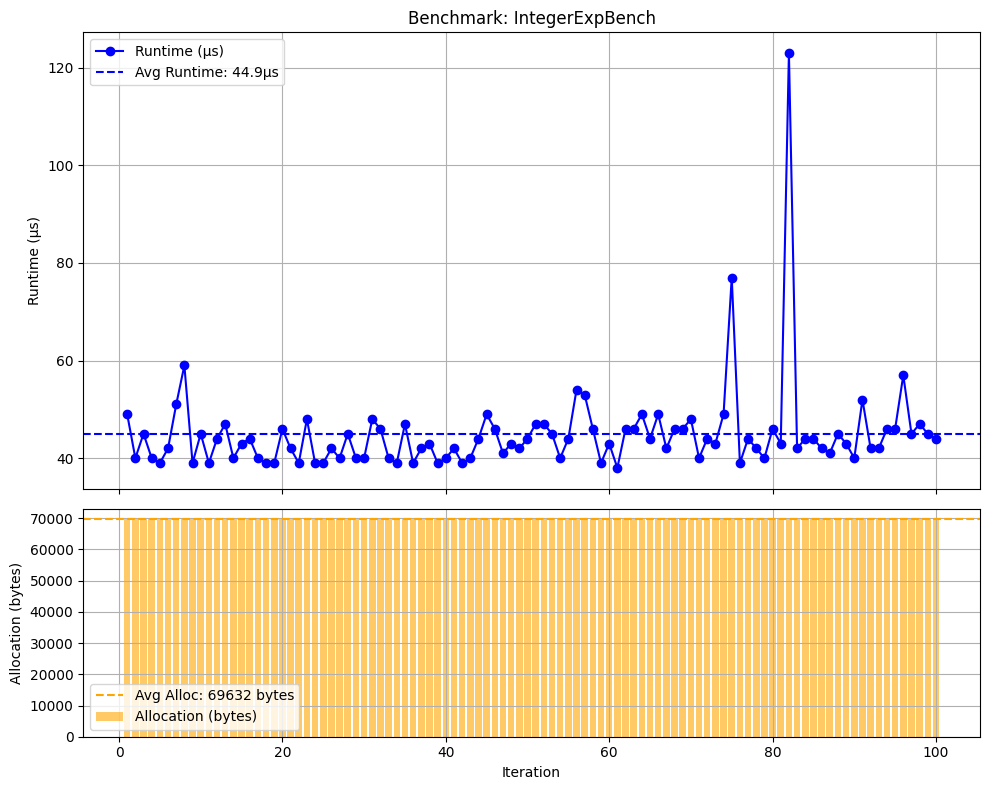

Benchmark: IntegerBigBench, Runs: 100, Runtimes: [494, 456, 468, 447, 457, 471, 447, 444, 538, 454, 489, 493, 459, 490, 447, 484, 457, 459, 465, 463, 446, 439, 451, 434, 487, 463, 478, 497, 472, 457, 499, 439, 489, 491, 445, 548, 503, 445, 444, 556, 434, 430, 474, 435, 447, 457, 439, 452, 466, 458, 445, 449, 463, 443, 445, 478, 462, 485, 502, 511, 453, 478, 469, 462, 482, 522, 447, 492, 434, 492, 440, 488, 476, 441, 467, 439, 466, 472, 434, 474, 544, 548, 446, 440, 444, 516, 467, 455, 449, 451, 468, 462, 466, 471, 456, 521, 433, 440, 475, 431], Allocations: [475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475136, 475

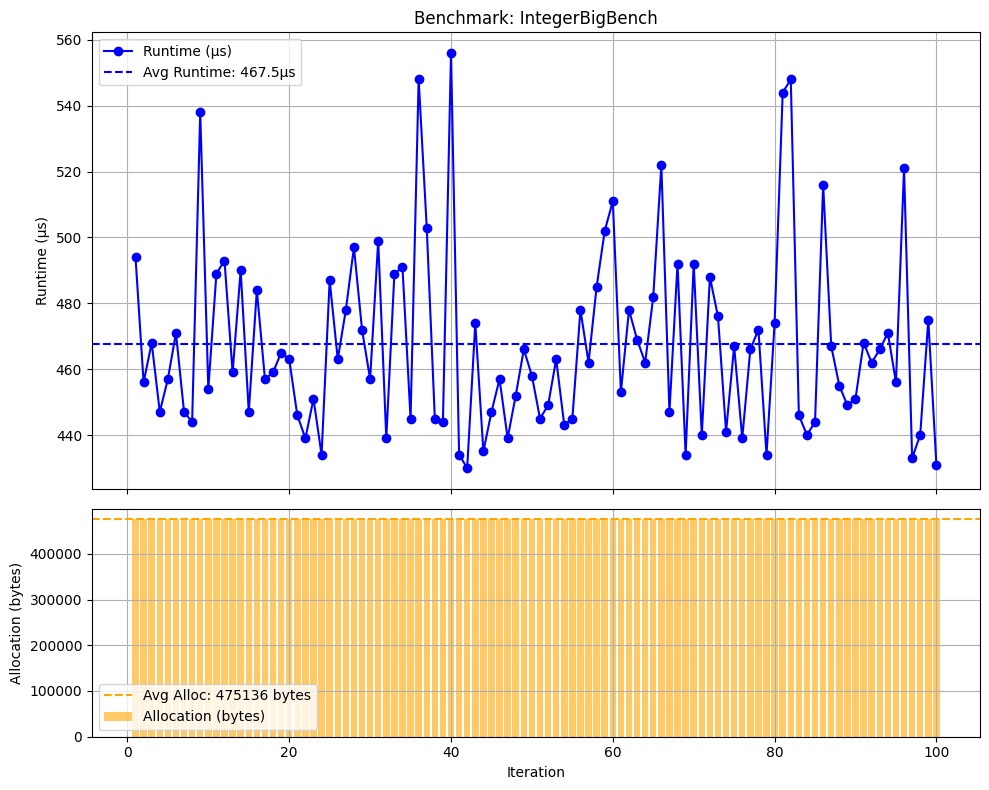

In [8]:
# General Configuration
BENCHMARKS = [
    "DoubleBench",
    "DoubleMedBench",
    "DoubleHighBench",
    "DoubleSqrtBench",
    "DoubleLExpBench",
    "IntegerBench",
    "IntegerMedBench",
    "IntegerHighBench",
    "IntegerExpBench",
    "IntegerBigBench"
]

runs = 100

for benchmark in BENCHMARKS:
    outcome = exec_bench(benchmark, runs)
    print(f"Benchmark: {benchmark}, Runs: {runs}, Runtimes: {outcome[0]}, Allocations: {outcome[1]}")
    plot_results(benchmark, outcome[0], outcome[1])